In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import StandardScaler 


Import Dataset using Pandas

In [3]:
data_sky= pd.read_csv("../input/Skyserver_SQL2_27_2018 6_51_39 PM.csv",header = 0)
data_sky.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
#Dropping the id feature
data_sky.drop(columns = ['objid'], inplace = True)
data_sky.head()

#Converting non-numeric data to numeric dataset
diag_map = {'STAR':1, 'GALAXY':2, 'QSO':3}
data_sky['class'] = data_sky['class'].map(diag_map)

#Preparing the data set
class_all = list(data_sky.shape)[0]
class_categories = list(data_sky['class'].value_counts())

print("The dataset has {} classes, {} stars, {} galaxies and {} quasars.".format(class_all, 
                                                                                 class_categories[0], 
                                                                                 class_categories[1],
                                                                                 class_categories[2]))
data_sky.describe()

The dataset has 10000 classes, 4998 stars, 4152 galaxies and 850 quasars.


,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,1.669800,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.625465,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,1.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,1.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,2.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,3.000000,5.353854,8410.000000,57481.000000,1000.000000


In [6]:
#Creating training and test datasets
y = data_sky["class"].values
X = data_sky.drop(["class"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [9]:
#Training Model
classifier = KNeighborsClassifier(n_neighbors=4)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [11]:
#Testing the model
y_pred = classifier.predict(X_test)  
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

0.234
[[666 162  14]
 [110 859  29]
 [ 43 110   7]]
              precision    recall  f1-score   support

           1       0.81      0.79      0.80       842
           2       0.76      0.86      0.81       998
           3       0.14      0.04      0.07       160

   micro avg       0.77      0.77      0.77      2000
   macro avg       0.57      0.57      0.56      2000
weighted avg       0.73      0.77      0.75      2000



In [13]:
#Improve Model Performance
#z-score transformed 
scaler = StandardScaler()  
scaler.fit(X_train)

#Training the model
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 
classifier = KNeighborsClassifier(n_neighbors=4)  
classifier.fit(X_train, y_train) 

#Testing the model
y_pred = classifier.predict(X_test)  
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

0.1035
[[753  88   1]
 [ 96 900   2]
 [  8  12 140]]
              precision    recall  f1-score   support

           1       0.88      0.89      0.89       842
           2       0.90      0.90      0.90       998
           3       0.98      0.88      0.92       160

   micro avg       0.90      0.90      0.90      2000
   macro avg       0.92      0.89      0.90      2000
weighted avg       0.90      0.90      0.90      2000



/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


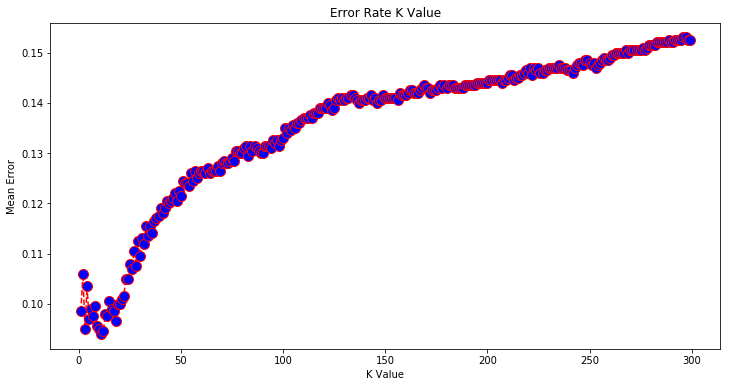

In [15]:
error = []

# Calculating error for K values between 1 and 300
for i in range(1, 300):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 300), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

plt.show()

In [16]:
#Training Model for better accuracy (change n neighbour value)
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=50)  
classifier.fit(X_train, y_train)

#Testing the model
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = classifier.predict(X_test)  
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

0.1215
[[664 176   2]
 [ 34 963   1]
 [  8  22 130]]
              precision    recall  f1-score   support

           1       0.94      0.79      0.86       842
           2       0.83      0.96      0.89       998
           3       0.98      0.81      0.89       160

   micro avg       0.88      0.88      0.88      2000
   macro avg       0.92      0.86      0.88      2000
weighted avg       0.89      0.88      0.88      2000

